<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3 - Webscrapping: Modeling Notebook

_Authors: Patrick Wales-Dinan_

---

This lab was incredibly challenging. We had to extensively clean a date set that was missing a lot of values and had TONS of categorical data. Then we had to decide what features to use to model that data. After that we had to build and fit the models making decisions like whether to use polynomial features, dummy variables etc, log scaling features or log scaling the depended variable.

After that we had to re run our model over and over again, looking at the different values of $\beta$ and seeing if they were contributing to the predictive power of the model. We had to decide if we should throw those values out or if we should leave them. We also had to make judgement calls to see if our model appeared to be over fitting or suffering from bias. 

## Contents:
- [Data Import](#Data-Import)
- [Baseline Accuracy](#Calculate-the-Baseline-Accuracy)
- [Train Test Split](#Train-Test-Split-Our-Data)
- [Log Scaling](#Log-Scaling-Independent-Variables)
- [Cleaning the Data and Modifying the Data](#Cleaning-&-Creating-the-Data-Set)
- [Modeling the Data](#Modeling-the-Data)
- [Model Analysis](#Analyzing-the-model)

Please visit the Graphs & Relationships notebook for additional visuals: Notebook - [Here](/Users/pwalesdi/Desktop/GA/GA_Project_2/Project_2_Graphs_&_Relationships.ipynb)


In [1]:
import requests
import time
import pandas as pd
import numpy as np
import seaborn as sns
import copy

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction import stop_words 
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.preprocessing import Imputer

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Data Import

In [2]:
df_reddit = pd.read_csv('./reddit.csv')

## Calculate the Baseline Accuracy

In [3]:
# Getting our baseline accuracy :: So 0.51 is the baseline accuracy for 0.
df_reddit['is_ca'] = df_reddit['ca']
df_reddit['is_ca'].value_counts(normalize=True)

0    0.511458
1    0.488542
Name: is_ca, dtype: float64

## Train Test Split Our Data

In [4]:
X = df_reddit['title']
y = df_reddit['is_ca']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=79)

X_train.head(10)


208     Freshman Rep. Katie Hill, who was part of the ...
1906    Is It OK To Criticize Politicians For Things T...
337     Progressive or moderate? New Orange County Dem...
506     What would happen if California became indepen...
30      Why can’t California pass more housing legisla...
819     Reminder: Every single GOP candidate for gover...
427             I’m Long Beach Mayor Robert Garcia – AMA!
657     The Wiyot Tribe believes this is sacred land, ...
1565    Texas governor fills courts with GOP judges vo...
1149    Former Secretary of State David Whitley back a...
Name: title, dtype: object

In [5]:
y_train.head(10)

208     1
1906    0
337     1
506     1
30      1
819     1
427     1
657     1
1565    0
1149    0
Name: is_ca, dtype: int64

In [6]:
# def model_analysis(df1, df2): 

In [7]:

# pipe = Pipeline([
#             ('vec', CountVectorizer()),
#             ('model', LogisticRegression())
# ])

# pipe_params = {
#     'vec' : [CountVectorizer(), TfidfVectorizer()],
#     'vec__max_features': [1500, 2000, 2500, 2700],
#     'vec__min_df': [2, 3, 4],
# #     'vec__max_df': [0.5, .60, .70],
#     'vec__ngram_range': [(1,2), (1,1)],
#     'model' : [LogisticRegression(), LogisticRegression(penalty='l1', solver='liblinear'), LogisticRegression(penalty='l2', solver='liblinear'), MultinomialNB()]
# #     'vec__stop_words': ['english']
# }

# gs = GridSearchCV(pipe, param_grid=pipe_params, cv=5, verbose=1, n_jobs=2)
# gs.fit(X_train, y_train)

# print(f' Best Parameters: {gs.best_params_}')
# print('')
# print(f' Cross Validation Accuracy Score: {gs.best_score_}')
# print(f' Training Data Accuracy Score: {gs.score(X_train, y_train)}')
# print(f' Testing Data Accuracy Score: {gs.score(X_test, y_test)}')

In [8]:
stop_words = ['to', 'the', 'in', 'of', 'for', 'and', 'on', 'is', 'it', 'with', 'what', 'about', 'are', 'as', 'from', 'at', 'will', 'that', 'says', 'by', 'be', 'this', 'can', 'has', 'how', 'california', 'texas']
vectorizer = CountVectorizer(tokenizer = None,
                            preprocessor = None,
                            stop_words = frozenset(stop_words),
                            max_features = 1500,
                            ngram_range= (1,1),
                            analyzer = 'word',
                            min_df=3) 
vectorizer.fit(X_train)
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)
X_train_df = pd.DataFrame(X_train.toarray(), columns=vectorizer.get_feature_names())
X_test_df = pd.DataFrame(X_test.toarray(), columns=vectorizer.get_feature_names())
y_train_df = pd.DataFrame(y_train)


In [9]:
X_train_df.sum().sort_values(ascending=False)

state            118
bill             102
trump             99
house             80
border            79
new               79
more              56
newsom            53
ca                50
over              50
after             49
gop               48
housing           46
tax               46
senate            46
county            45
not               44
up                43
rep               43
democrats         42
lawmakers         41
voters            41
gov               41
his               41
wall              41
he                40
could             38
gavin             37
but               37
they              37
san               36
migrant           36
year              35
against           35
beto              35
election          35
2020              34
republicans       34
republican        33
was               33
campaign          33
big               32
rourke            32
one               32
have              32
voter             32
governor          30
law          

In [10]:
X_test_df.sum().sort_values(ascending=False)

trump             38
state             38
new               29
border            27
bill              27
more              25
house             23
after             22
newsom            21
who               21
vote              18
ca                18
out               17
tax               16
could             16
have              16
gov               15
san               15
election          15
big               14
county            14
governor          14
up                14
000               14
2020              14
over              14
not               14
we                13
democrats         13
he                13
housing           13
gavin             13
but               12
against           12
his               12
school            12
gop               11
crisis            11
do                11
than              11
race              11
now               11
brown             11
law               11
all               11
an                11
most              10
poll         

In [11]:
y_train_df = y_train_df.reset_index()
y_train_df

,index,is_ca
0,208,1
1,1906,0
2,337,1
3,506,1
4,30,1
5,819,1
6,427,1
7,657,1
8,1565,0
9,1149,0


In [12]:
# print(X_train_df.index)
# print(y_train_df.reset_index().index)

corr = pd.concat([X_train_df, y_train_df], axis=1)

In [13]:
corr.corr()[['is_ca']].sort_values('is_ca', ascending=False).head(100)

,is_ca
is_ca,1.000000
newsom,0.196341
gavin,0.166275
ca,0.165732
housing,0.146495
los,0.111912
angeles,0.111912
prop,0.099973
jerry,0.097727
proposition,0.095279


In [14]:
lr = LogisticRegression(penalty='l1')
lr.fit(X_train_df, y_train)
print(lr.score(X_train_df, y_train))
print(lr.score(X_test_df, y_test))
print(f'Intercept: {lr.intercept_}')
print('')
print(f'Coefficient: {lr.coef_}')
print('')
print(f'Exponentiated Coefficient: {np.exp(lr.coef_)}')


0.9118055555555555
0.7895833333333333
Intercept: [0.40562278]

Coefficient: [[-0.39937859  0.69146751 -0.61699962 ...  0.          0.
   0.        ]]

Exponentiated Coefficient: [[0.67073672 1.99664347 0.5395609  ... 1.         1.         1.        ]]


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [15]:
print(f'Logreg predicted values: {lr.predict(X_train_df.head())}')
print(f'Logreg predicted probabilities: {lr.predict_proba(X_train_df.head())}')


Logreg predicted values: [1 1 1 1 1]
Logreg predicted probabilities: [[6.72068619e-05 9.99932793e-01]
 [3.74275950e-01 6.25724050e-01]
 [1.03701240e-01 8.96298760e-01]
 [1.03780928e-01 8.96219072e-01]
 [1.30081817e-01 8.69918183e-01]]


In [16]:
preds = lr.predict(X_test_df)
confusion_matrix(y_test, # True values.
                 preds)  # Predicted values.


array([[176,  69],
       [ 32, 203]])

In [17]:
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

In [18]:
spec = tn / (tn + fp)

print(f'Specificity: {round(spec,4)}')

Specificity: 0.7184


In [19]:
sens = tp / (tp + fn)

print(f'Sensitivity: {round(sens,4)}')

Sensitivity: 0.8638


In [20]:
coef_df = pd.DataFrame({'variables':X_train_df.columns})
print(lr.coef_.shape)
coe = pd.DataFrame({'ß - Beta':np.squeeze(np.exp(lr.coef_))})
coef_df = pd.concat([coef_df, coe], axis=1)
values = pd.DataFrame(X_train_df, index=list(range(0,2049)), columns=coef_df['variables'])
values['CA_Post'] = y
values.head()

(1, 1251)


variables,000,10,100,10th,11,12,120,13,14,16,18,19,1st,20,2016,2018,2019,2020,21,24,25,30,39,40,48,49,50,500,60,70,86th,abbott,able,abortion,abortions,access,accused,across,action,activist,activists,ad,address,administration,admissions,admits,advances,advisory,advocates,affairs,affected,afford,affordability,affordable,after,ag,again,against,age,agency,agents,aggressive,agrees,ahead,aid,aide,aims,air,alexandria,all,allegations,allies,allow,allowed,allowing,almost,already,am,ama,amendment,america,american,americans,amid,among,amp,an,analysis,angeles,announcement,announces,another,anti,antonio,any,anyone,appeal,approval,approves,april,area,aren,armed,arrested,arrests,ask,asking,assault,assembly,assemblyman,asylum,attack,attempt,attorney,austin,authority,away,baby,back,backed,background,backlash,bad,bail,ballot,ban,bank,banning,bans,battle,bay,beach,became,because,becerra,become,becomes,been,beer,before,behind,being,berkeley,bernie,best,beto,between,bid,biden,big,bigger,bill,billion,bills,bipartisan,block,blocks,blue,board,bonnen,border,botched,both,boy,break,bribery,bringing,broken,brown,budget,build,building,built,business,but,ca,calif,californians,call,called,calls,calmatters,cameras,camp,campa,campaign,camps,campus,candidate,candidates,cannabis,capitol,car,care,carry,cars,case,cases,cash,castro,caucus,cbd,census,center,centers,central,chair,chairman,challenge,challenger,challenges,chance,change,changes,charge,check,checks,chick,chief,child,children,chip,choice,church,cisneros,cities,citizen,citizens,citizenship,city,civil,claim,claims,clash,clean,clear,climate,close,closed,closer,colleagues,college,colleges,com,come,comes,commentary,comments,commission,commissioner,...,see,seek,seeks,seen,sees,seize,seliger,sen,senate,senator,services,session,set,several,sexual,sf,shape,she,shelter,shooting,should,showing,shows,shut,shutdown,sick,sign,signs,silicon,since,single,size,skid,skipped,small,so,social,soda,solutions,solve,some,someone,south,southern,speaker,special,speech,speed,spending,spent,stand,star,start,starting,starts,state,statement,states,statewide,station,step,stepped,steve,stickland,still,stop,stops,story,strategy,straus,street,strike,strikes,student,students,study,sub,sue,sued,sues,suing,support,suppression,supreme,surge,surplus,surprise,suspect,suspected,swalwell,system,take,takes,taking,talk,targeting,targets,tarrant,tax,taxes,taxpayer,teacher,teachers,team,ted,tells,tenant,tent,term,testimony,texan,texans,texaspolitics,than,thanks,their,them,there,these,they,things,think,third,those,thousands,threat,threatens,three,through,thursday,time,times,tobacco,today,told,too,top,town,toxic,track,traffic,trafficking,trail,transparency,tribune,troops,trump,try,trying,turn,twitter,two,tx,uc,unaccompanied,unconstitutional,under,unemployment,union,unions,university,until,up,upholds,upset,urging,us,use,used,using,ut,utilities,utility,vaccine,valley,vice,victim,video,visit,vote,voted,voter,voters,votes,voting,vs,waiting,wall,want,wants,war,warnings,warns,warren,wars,was,washington,watch,water,wave,way,ways,we,wealthy,website,weed,weeks,weigh,well,wells,went,were,west,when,where,which,while,white,whitley,who,why,wildfire,wildfires,win,wins,withhold,without,woman,women,won,words,work,workers,working,world,worse,worst,worth,would,wrong,xavier,year,years,yes,yet,you,young,your,zero,CA_Post
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [21]:
coef_df.sort_values('ß - Beta', ascending=False)

,variables,ß - Beta
175,ca,32.806397
764,newsom,22.197561
882,proposition,6.691867
686,los,6.458265
343,do,6.299533
177,californians,5.990731
835,pg,5.355379
883,propositions,5.342767
795,orange,5.054437
593,jerry,4.749805


In [72]:
from os import path
import scipy
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from scipy.ndimage.interpolation import zoom
cali_mask = np.array(Image.open("./download.png"))

In [73]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val
transformed_cali_mask = np.ndarray((cali_mask.shape[0],cali_mask.shape[1]), np.int32)

for i in range(len(cali_mask)):
    transformed_cali_mask[i] = list(map(transform_format, cali_mask[i]))


In [92]:
im_small = zoom(transformed_cali_mask, (2.25))

In [94]:
text = " ".join(post for post in X)
print ("There are {} words in all posts.".format(len(text)))

There are 163829 words in all posts.


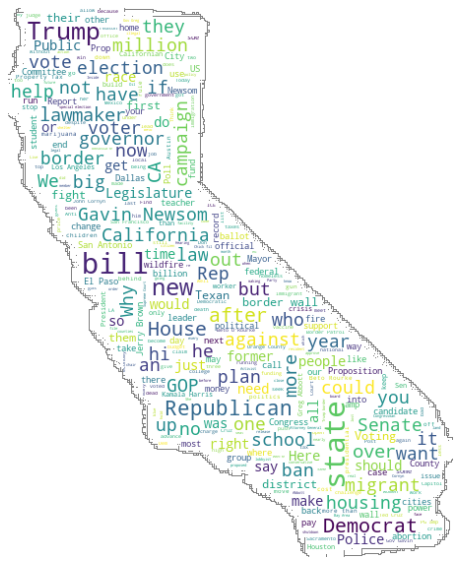

In [93]:
wordcloud = WordCloud(stopwords=stop_words, max_font_size=30, max_words=500, background_color="white", mask=im_small, contour_color='grey', contour_width=0.5).generate(text)
plt.figure(figsize= [8,23])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [25]:
# vote = VotingClassifier([
#     ('tree', DecisionTreeClassifier()),
#     ('ada', AdaBoostClassifier()),
#     ('grad', GradientBoostingClassifier()),
#     ('logreg', LogisticRegression())
# ])

# pipe = Pipeline([
#     ('vote', vote)
# ])

# pipe_params = {
#     'vote__tree__max_depth' : [None, 1, 2],
#     'vote__ada__n_estimators' : [40, 50, 60],
#     'vote__grad__n_estimators' : [90, 100],
#     'vote__logreg__penalty' : ['l1', 'l2'],
# }

# gs = GridSearchCV(pipe, param_grid=pipe_params, cv=3)
# gs.fit(X_train, y_train)
# print(gs.best_score_) # cross val accuracy score
# gs.best_params_